# Decision Tree

In [11]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
from matplotlib.ticker import PercentFormatter
from sklearn.tree import DecisionTreeRegressor

Import OSNIR Dataset and shuffle data

In [12]:
# import OSNIR dataset
df = pd.read_csv('../Data/OSNIR_values_extendedv3_new datasetbcsv.csv')
# shuffling rows of OSNIR dataframe and reset indexes
df = df.sample(frac=1)
df.reset_index(inplace=True, drop=True)

Divide data into\
1800 values for training (0,1800-1)\
600 values for validation (1800,2400-1)\
600 values for testing (2400,3000-1)\

In [13]:
data = np.array(df)
# input x aka Ns, Pch, L, B, GB, Nch values
x_train = data[0:1800-1, 1:7]
x_valid = data[1800:2400-1, 1:7]
x_test = data[2400:3000-1, 1:7]

# output y aka OSNIR values
y_train = data[0:1800-1, 0]
y_valid = data[1800:2400-1, 0]
y_test = data[2400:3000-1, 0]

#### Create the Decision Tree Model

In [14]:
model = DecisionTreeRegressor(max_depth=10)
model.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=10)

In [15]:
OSNIR_num = data[:3000-1,0]
Input_num = data[:3000-1,1:7]

In [16]:
OSNIR_est = (model.predict(Input_num))

In [17]:
for i in range(10):
    print('%s => %f (expected %f)' % (Input_num[i].tolist(), OSNIR_est[i], OSNIR_num[i] ))

[11.0, -5.0, 100.0, 50.0, 0.0, 9.0] => 10.535071 (expected 10.535071)
[33.0, 0.0, 50.0, 25.0, 0.0, 15.0] => 13.369203 (expected 13.292427)
[45.0, 3.0, 50.0, 50.0, 0.0, 9.0] => 11.107622 (expected 11.107622)
[13.0, -10.0, 5.0, 25.0, 0.0, 9.0] => 27.127543 (expected 27.127543)
[8.0, 2.0, 10.0, 50.0, 0.0, 9.0] => 26.631023 (expected 25.440269)
[10.0, -3.0, 100.0, 25.0, 0.0, 9.0] => 16.135003 (expected 15.506781)
[16.0, -5.0, 100.0, 25.0, 0.0, 9.0] => 11.741498 (expected 11.700579)
[21.0, 0.0, 100.0, 25.0, 0.0, 15.0] => 12.485231 (expected 12.305847)
[40.0, -3.0, 100.0, 12.5, 0.0, 9.0] => 10.119765 (expected 10.416711)
[20.0, -3.0, 50.0, 25.0, 0.0, 9.0] => 20.301825 (expected 20.208223)


In [18]:
Mism = np.zeros(3000-1)
for i in range(3000-1):
    Mism[i] = OSNIR_num[i] - OSNIR_est[i]

In [19]:
pred_df = pd.DataFrame({"Actual OSNIR (dB)" : OSNIR_num.tolist(), "Predicted OSNIR (dB)" : OSNIR_est.tolist(), "Difference (dB)" : Mism.tolist()})
pred_df.to_csv("OSNIR_Prediction_DT.csv",index=False)

(array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 3.33444481e-04, 0.00000000e+00, 1.00033344e-03,
        2.66755585e-03, 9.00300100e-03, 2.13404468e-02, 5.50183394e-02,
        1.52717573e-01, 4.92497499e-01, 1.86395465e-01, 5.20173391e-02,
        1.53384461e-02, 6.66888963e-03, 2.66755585e-03, 1.33377793e-03,
        0.00000000e+00, 1.00033344e-03, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]),
 array([-10.        ,  -9.42857143,  -8.85714286,  -8.28571429,
         -7.71428571,  -7.14285714,  -6.57142857,  -6.        ,
         -5.42857143,  -4.85714286,  -4.28571429,  -3.71428571,
         -3.14285714,  -2.57142857,  -2.        ,  -1.42857143,
         -0.85714286,  -0.28571429,   0.28571429,   0.85714286,
          1.42857143,   2.        ,   2.571428

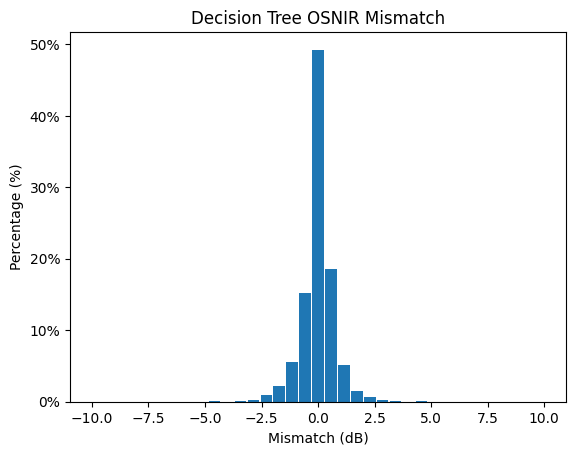

In [20]:
plt.title('Decision Tree OSNIR Mismatch')
plt.xlabel('Mismatch (dB)')
plt.ylabel('Percentage (%)')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.hist(Mism, range=(-10,10), rwidth=0.9, bins=35, weights=np.ones(len(Mism))/len(Mism))